In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(2)

data = pd.read_csv(r"C:\Users\rites\Downloads\Credit-Card-Fraud\Dataset\creditcard.csv")

## data exploration

data

## Data preprocessing

from sklearn.preprocessing import StandardScaler

data['normalized_amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'], axis = 1)

data.head()

data = data.drop(['Time'], axis = 1)

data.head()

x = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

x.head()

y.head()

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

x_test.shape, x_train.shape

((85443, 29), (199364, 29))

## Random Forest

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
rf = RandomForestClassifier(n_estimators = 100)

In [7]:
rf.fit(x_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [12]:
y_pred = rf.predict(x_test)

In [13]:
rf.score(x_test, y_test)

0.9995084442259752

In [14]:
from sklearn.metrics import confusion_matrix

In [19]:
cm = confusion_matrix(y_test, y_pred.round())
cm

array([[85290,     6],
       [   36,   111]], dtype=int64)

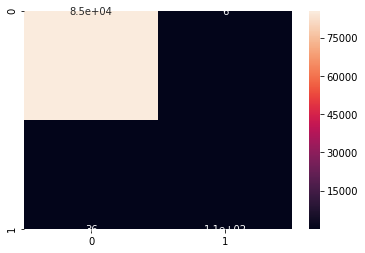

In [20]:
sns.heatmap(cm, annot = True)